In [19]:
# Python Library
import os
import glob
import sys
import numpy as np

from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.table import hstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Jupyter Setting
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [20]:
from astropy.wcs import WCS

In [21]:
path_data = '/large_data/processed/UDS/7DT01/m650'
datalist = sorted(glob.glob(f"{path_data}/calib*0.fits"))
print(f"{len(datalist)} data found")

480 data found


UDS Field
- Position (RA):	2 17 37.69
- Position (Dec):	-5° 13' 13.41"

In [32]:
filename = datalist[0]
w = WCS(filename)
example_data = fits.getdata(filename)
yshape, xshape = example_data.shape
ycenter, xcenter = int(yshape/2.), int(xshape/2.)

c_target = SkyCoord('2 17 37.69 -5 13 13.41', unit=(u.hourangle, u.deg))

In [73]:
outbl = Table()
outbl['filename'] = datalist
outbl['mjd'] = 0.
outbl['center_ra'] = 0.
outbl['center_dec'] = 0.
outbl['point_x'] = 0.
outbl['point_y'] = 0.

for ff, filename in enumerate(datalist):

	w = WCS(filename)

	(_ra, _dec) = w.all_pix2world(xcenter, ycenter, 3)
	ra, dec = _ra.item(), _dec.item()

	(_x, _y) = w.all_world2pix(c_target.ra.deg, c_target.dec.deg, 3)
	x, y = _x.item(), _y.item()

	outbl['center_ra'][ff] = ra
	outbl['center_dec'][ff] = dec
	outbl['point_x'][ff] = x
	outbl['point_y'][ff] = y

	outbl['mjd'][ff] = fits.getheader(filename)['MJD']

outbl['point_diff_x'] = outbl['point_x'] - xcenter
outbl['point_diff_y'] = outbl['point_y'] - ycenter
outbl['delta_day'] = outbl['mjd'] - outbl['mjd'].min()
outbl['delta_min'] = outbl['delta_day']*24*60

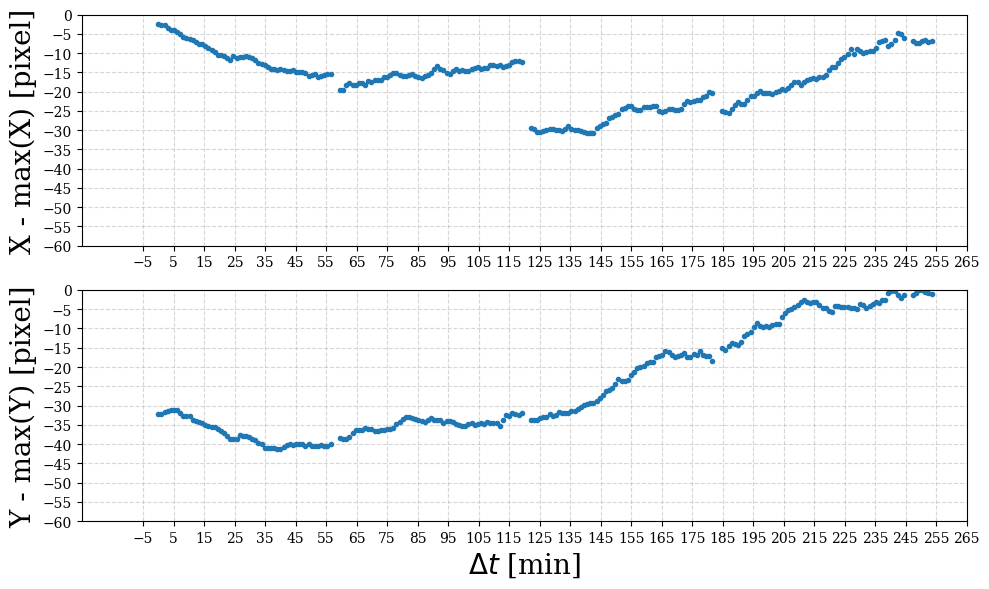

In [91]:
yticks = np.arange(-60, 0+5, 5)
xticks = np.arange(-5, 260+10, 10)

fig = plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(outbl['delta_min'], outbl['point_x']-outbl['point_x'].max(), '.')
# plt.xlim([6.029*1e4+6, 6.029*1e4+6.3])
plt.xlim(-25, 260)
plt.ylim(-50, 0)
# plt.xticks([])
plt.yticks(yticks)
plt.xticks(xticks)
plt.ylabel("X - max(X) [pixel]")
# plt.xlabel(r"$\Delta t$ [min]")
plt.grid('both', ls='--', alpha=0.5)

plt.subplot(212)
plt.plot(outbl['delta_min'], outbl['point_y']-outbl['point_y'].max(), '.')
# plt.xlim([6.029*1e4+6, 6.029*1e4+6.3])
plt.xlim(-25, 260)
plt.ylim(-50, 0)

plt.yticks(yticks)
plt.xticks(xticks)

plt.ylabel("Y - max(Y) [pixel]")
plt.xlabel(r"$\Delta t$ [min]")
plt.grid('both', ls='--', alpha=0.5)

# plt.plot(outbl['mjd'], outbl['point_x'], '.')
# plt.plot(outbl['mjd'], outbl['point_y'], '.')
# plt.ylim(4856, 4857)

plt.tight_layout()